<a href="https://colab.research.google.com/github/VishnuBhaarath/Rainfallpred/blob/master/LSTMsinglelayermae100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from sklearn.metrics import r2_score

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
df=pd.read_excel('trend_anna_imd_21.xlsx')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1
0,1. Cuddalore,NaN
1,1965-01-01 00:00:00,10.6
2,1965-01-02 00:00:00,0.0
3,1965-01-03 00:00:00,13.0
4,1965-01-04 00:00:00,0.0


In [0]:
Cuddalore=df[3655:19360]
Panruti=df[23016:38720]
Dharmapuri=df[42408:58082]
Harur=df[61738:77443]
Palacode=df[81158:96804]
Pennagaram=df[100460:116165]
Chengam=df[119821:135526]
Sathanur=df[138817:154522]
Tiruvanamalai=df[158178:173883]
Sankarapuram=df[177539:193244]
Tirukoilur=df[196899:212604]
ulundurpet=df[216260:231965]
Villupuram=df[235621:251326]
Denkanikottai=df[274343:290048]
Hosur=df[293703:309408]
Krishnagiri=df[313063:328768]
Marandahalli=df[332059:347764]
Rayakottai=df[353250:368955]
Uthangarai=df[372611:388316]


In [0]:
Cuddalore.columns = ['Date', 'Rainfall']
Panruti.columns= ['Date', 'Rainfall']
Dharmapuri.columns= ['Date', 'Rainfall']
Harur.columns= ['Date', 'Rainfall']
Palacode.columns= ['Date', 'Rainfall']
Pennagaram.columns= ['Date', 'Rainfall']
Chengam.columns= ['Date', 'Rainfall']
Sathanur.columns= ['Date', 'Rainfall']
Tiruvanamalai.columns= ['Date', 'Rainfall']
Sankarapuram.columns= ['Date', 'Rainfall']
Tirukoilur.columns= ['Date', 'Rainfall']
ulundurpet.columns= ['Date', 'Rainfall']
Villupuram.columns= ['Date', 'Rainfall']
Denkanikottai.columns= ['Date', 'Rainfall']
Hosur.columns= ['Date', 'Rainfall']
Krishnagiri.columns= ['Date', 'Rainfall']
Marandahalli.columns= ['Date', 'Rainfall']
Rayakottai.columns= ['Date', 'Rainfall']
Uthangarai.columns= ['Date', 'Rainfall']

In [0]:
train=Cuddalore[0:12000]
test=Cuddalore[12000:15704]
train1=Panruti[0:12000]
test1=Panruti[12000:15705]
train2=Dharmapuri[0:12000]
test2=Dharmapuri[12000:15674]
train3=Harur[0:12000]
test3=Harur[12000:15704]
train4=Palacode[0:12000]
test4=Palacode[12000:15646]
train5=Pennagaram[0:12000]
test5=Pennagaram[12000:15705]
train6=Chengam[0:12000]
test6=Chengam[12000:15705]
train7=Sathanur[0:12000]
test7=Sathanur[12000:15705]
train8=Tiruvanamalai[0:12000]
test8=Tiruvanamalai[12000:15165]
train9=Sankarapuram[0:12000]
test9=Sankarapuram[12000:15705]
train10=Tirukoilur[0:12000]
test10=Tirukoilur[12000:15705]
train11=ulundurpet[0:12000]
test11=ulundurpet[12000:15345]
train12=Villupuram[0:12000]
test12=Villupuram[12000:15705]
train13=Denkanikottai[0:12000]
test13=Denkanikottai[12000:15705]
train14=Hosur[0:12000]
test14=Hosur[12000:15678]
train15=Krishnagiri[0:12000]
test15=Krishnagiri[12000:15705]
train16=Marandahalli[0:12000]
test16=Marandahalli[12000:15705]
train17=Rayakottai[0:12000]
test17=Rayakottai[12000:15705]
train18=Uthangarai[0:12000]
test18=Uthangarai[12000:15705]

In [0]:
X_train=train['Rainfall']
X_test=test['Rainfall']
X_train1=train1['Rainfall']
X_test1=test1['Rainfall']
X_train2=train2['Rainfall']
X_test2=test2['Rainfall']
X_train3=train3['Rainfall']
X_test3=test3['Rainfall']
X_train4=train4['Rainfall']
X_test4=test4['Rainfall']
X_train5=train5['Rainfall']
X_test5=test5['Rainfall']
X_train6=train6['Rainfall']
X_test6=test6['Rainfall']
X_train7=train7['Rainfall']
X_test7=test7['Rainfall']
X_train8=train8['Rainfall']
X_test8=test8['Rainfall']
X_train9=train9['Rainfall']
X_test9=test9['Rainfall']
X_train10=train10['Rainfall']
X_test10=test10['Rainfall']
X_train11=train11['Rainfall']
X_test11=test11['Rainfall']
X_train12=train12['Rainfall']
X_test12=test12['Rainfall']
X_train13=train13['Rainfall']
X_test13=test13['Rainfall']
X_train14=train14['Rainfall']
X_test14=test14['Rainfall']
X_train15=train15['Rainfall']
X_test15=test15['Rainfall']
X_train16=train16['Rainfall']
X_test16=test16['Rainfall']
X_train17=train17['Rainfall']
X_test17=test17['Rainfall']
X_train18=train18['Rainfall']
X_test18=test18['Rainfall']


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(X_train.values.reshape(-1,1))
X_train = pd.DataFrame(x_scaled)

x_scaled1 = min_max_scaler.fit_transform(X_train1.values.reshape(-1,1))
X_train1 = pd.DataFrame(x_scaled1)

x_scaled2 = min_max_scaler.fit_transform(X_train2.values.reshape(-1,1))
X_train2 = pd.DataFrame(x_scaled2)

x_scaled3 = min_max_scaler.fit_transform(X_train3.values.reshape(-1,1))
X_train3 = pd.DataFrame(x_scaled3)

x_scaled4 = min_max_scaler.fit_transform(X_train4.values.reshape(-1,1))
X_train4 = pd.DataFrame(x_scaled4)

x_scaled5 = min_max_scaler.fit_transform(X_train5.values.reshape(-1,1))
X_train5 = pd.DataFrame(x_scaled5)

x_scaled6 = min_max_scaler.fit_transform(X_train6.values.reshape(-1,1))
X_train6 = pd.DataFrame(x_scaled6)

x_scaled7 = min_max_scaler.fit_transform(X_train7.values.reshape(-1,1))
X_train7 = pd.DataFrame(x_scaled7)

x_scaled8 = min_max_scaler.fit_transform(X_train8.values.reshape(-1,1))
X_train8 = pd.DataFrame(x_scaled8)

x_scaled9 = min_max_scaler.fit_transform(X_train9.values.reshape(-1,1))
X_train9 = pd.DataFrame(x_scaled9)

x_scaled10 = min_max_scaler.fit_transform(X_train10.values.reshape(-1,1))
X_train10 = pd.DataFrame(x_scaled10)

x_scaled11 = min_max_scaler.fit_transform(X_train11.values.reshape(-1,1))
X_train11 = pd.DataFrame(x_scaled11)

x_scaled1112 = min_max_scaler.fit_transform(X_train12.values.reshape(-1,1))
X_train12 = pd.DataFrame(x_scaled1112)

x_scaled13 = min_max_scaler.fit_transform(X_train13.values.reshape(-1,1))
X_train13 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_train14.values.reshape(-1,1))
X_train14 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_train15.values.reshape(-1,1))
X_train15 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_train16.values.reshape(-1,1))
X_train16 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_train17.values.reshape(-1,1))
X_train17 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_train18.values.reshape(-1,1))
X_train18 = pd.DataFrame(x_scaled18)



In [0]:
x_scaled1 = min_max_scaler.fit_transform(X_test.values.reshape(-1,1))
X_test = pd.DataFrame(x_scaled1)

x_scaled11 = min_max_scaler.fit_transform(X_test1.values.reshape(-1,1))
X_test1 = pd.DataFrame(x_scaled11)

x_scaled12 = min_max_scaler.fit_transform(X_test2.values.reshape(-1,1))
X_test2 = pd.DataFrame(x_scaled12)

x_scaled13 = min_max_scaler.fit_transform(X_test3.values.reshape(-1,1))
X_test3 = pd.DataFrame(x_scaled13)

x_scaled14 = min_max_scaler.fit_transform(X_test4.values.reshape(-1,1))
X_test4 = pd.DataFrame(x_scaled14)

x_scaled15 = min_max_scaler.fit_transform(X_test5.values.reshape(-1,1))
X_test5 = pd.DataFrame(x_scaled15)

x_scaled16 = min_max_scaler.fit_transform(X_test6.values.reshape(-1,1))
X_test6 = pd.DataFrame(x_scaled16)

x_scaled17 = min_max_scaler.fit_transform(X_test7.values.reshape(-1,1))
X_test7 = pd.DataFrame(x_scaled17)

x_scaled18 = min_max_scaler.fit_transform(X_test8.values.reshape(-1,1))
X_test8 = pd.DataFrame(x_scaled18)

x_scaled19 = min_max_scaler.fit_transform(X_test9.values.reshape(-1,1))
X_test9 = pd.DataFrame(x_scaled19)

x_scaled110 = min_max_scaler.fit_transform(X_test10.values.reshape(-1,1))
X_test10 = pd.DataFrame(x_scaled110)

x_scaled111 = min_max_scaler.fit_transform(X_test11.values.reshape(-1,1))
X_test11 = pd.DataFrame(x_scaled111)

x_scaled112 = min_max_scaler.fit_transform(X_test12.values.reshape(-1,1))
X_test12 = pd.DataFrame(x_scaled112)

x_scaled113 = min_max_scaler.fit_transform(X_test13.values.reshape(-1,1))
X_test13 = pd.DataFrame(x_scaled113)

x_scaled114 = min_max_scaler.fit_transform(X_test14.values.reshape(-1,1))
X_test14 = pd.DataFrame(x_scaled114)

x_scaled115= min_max_scaler.fit_transform(X_test15.values.reshape(-1,1))
X_test15 = pd.DataFrame(x_scaled115)

x_scaled116 = min_max_scaler.fit_transform(X_test16.values.reshape(-1,1))
X_test16 = pd.DataFrame(x_scaled116)

x_scaled117 = min_max_scaler.fit_transform(X_test17.values.reshape(-1,1))
X_test17 = pd.DataFrame(x_scaled117)

x_scaled118 = min_max_scaler.fit_transform(X_test18.values.reshape(-1,1))
X_test18 = pd.DataFrame(x_scaled118)


In [0]:
in_seq = np.array([X_train[0]])
in_seqtest1 = np.array([X_test[0]])

in_seq1 = np.array([X_train1[0]])
in_seqt11 = np.array([X_test1[0]])

in_seq12 = np.array([X_train2[0]])
in_seqt112 = np.array([X_test2[0]])

in_seq13 = np.array([X_train3[0]])
in_seqt113 = np.array([X_test3[0]])

in_seq14 = np.array([X_train4[0]])
in_seqt114 = np.array([X_test4[0]])

in_seq15 = np.array([X_train5[0]])
in_seqt115 = np.array([X_test5[0]])

in_seq16 = np.array([X_train6[0]])
in_seqt116 = np.array([X_test6[0]])

in_seq17 = np.array([X_train7[0]])
in_seqt117 = np.array([X_test7[0]])

in_seq18 = np.array([X_train8[0]])
in_seqt118 = np.array([X_test8[0]])

in_seq19 = np.array([X_train9[0]])
in_seqt119 = np.array([X_test9[0]])

in_seq110 = np.array([X_train10[0]])
in_seqt1110 = np.array([X_test10[0]])

in_seq111 = np.array([X_train11[0]])
in_seqt1111 = np.array([X_test11[0]])

in_seq112 = np.array([X_train12[0]])
in_seqt1112 = np.array([X_test12[0]])

in_seq113 = np.array([X_train13[0]])
in_seqt1113 = np.array([X_test13[0]])

in_seq114 = np.array([X_train14[0]])
in_seqt1114 = np.array([X_test14[0]])

in_seq115 = np.array([X_train15[0]])
in_seqt1115 = np.array([X_test15[0]])

in_seq116 = np.array([X_train16[0]])
in_seqt1116 = np.array([X_test16[0]])

in_seq117 = np.array([X_train17[0]])
in_seqt1117 = np.array([X_test17[0]])

in_seq118 = np.array([X_train18[0]])
in_seqt1118 = np.array([X_test18[0]])


In [0]:
in_seq = in_seq.reshape((12000, 1))
in_seqtest1 = in_seqtest1.reshape((3704, 1))

in_seq1 = in_seq1.reshape((12000, 1))
in_seqt11 = in_seqt11.reshape((3704, 1))

in_seq12 = in_seq12.reshape((12000, 1))
in_seqt112 = in_seqt112.reshape((3674, 1))

in_seq13 = in_seq13.reshape((12000, 1))
in_seqt113 = in_seqt113.reshape((3704, 1))

in_seq14 = in_seq14.reshape((12000, 1))
in_seqt114 = in_seqt114.reshape((3646, 1))

in_seq15 = in_seq15.reshape((12000, 1))
in_seqt115 = in_seqt115.reshape((3705, 1))

in_seq16 = in_seq16.reshape((12000, 1))
in_seqt116 = in_seqt116.reshape((3705, 1))

in_seq17 = in_seq17.reshape((12000, 1))
in_seqt117 = in_seqt117.reshape((3705, 1))

in_seq18 = in_seq18.reshape((12000, 1))
in_seqt118 = in_seqt118.reshape((3165, 1))

in_seq19 = in_seq19.reshape((12000, 1))
in_seqt119 = in_seqt119.reshape((3705, 1))

in_seq110 = in_seq110.reshape((12000, 1))
in_seqt1110 = in_seqt1110.reshape((3705, 1))

in_seq111 = in_seq111.reshape((12000, 1))
in_seqt1111 = in_seqt1111.reshape((3345, 1))

in_seq112 = in_seq112.reshape((12000, 1))
in_seqt1112 = in_seqt1112.reshape((3705, 1))

in_seq113 = in_seq113.reshape((12000, 1))
in_seqt1113 = in_seqt1113.reshape((3705, 1))

in_seq114 = in_seq114.reshape((12000, 1))
in_seqt1114 = in_seqt1114.reshape((3678, 1))

in_seq115 = in_seq115.reshape((12000, 1))
in_seqt1115 = in_seqt1115.reshape((3705, 1))

in_seq116 = in_seq116.reshape((12000, 1))
in_seqt1116 = in_seqt1116.reshape((3705, 1))

in_seq117 = in_seq117.reshape((12000, 1))
in_seqt1117 = in_seqt1117.reshape((3705, 1))

in_seq118 = in_seq118.reshape((12000, 1))
in_seqt1118 = in_seqt1118.reshape((3704, 1))



In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
cuddataset1 = hstack((in_seqtest1))
cuddataset = hstack((in_seq))

pandataset1 = hstack((in_seqt11))
pandataset = hstack((in_seq1))

dhadataset1 = hstack((in_seqt112))
dhadataset = hstack((in_seq12))

hardataset1 = hstack((in_seqt113))
hardataset = hstack((in_seq13))

paldataset1 = hstack((in_seqt114))
paldataset = hstack((in_seq14))

pendataset1 = hstack((in_seqt115))
pendataset = hstack((in_seq15))

chedataset1 = hstack((in_seqt116))
chedataset = hstack((in_seq16))

satdataset1 = hstack((in_seqt117))
satdataset = hstack((in_seq17))

Tirdataset1 = hstack((in_seqt118))
Tirdataset = hstack((in_seq18))

Sandataset1 = hstack((in_seqt119))
Sandataset = hstack((in_seq19))

Tirudataset1 = hstack((in_seqt1110))
Tirudataset = hstack((in_seq110))

uludataset1 = hstack((in_seqt1111))
uludataset = hstack((in_seq111))

vildataset1 = hstack((in_seqt1112))
vildataset = hstack((in_seq112))

bardataset1 = hstack((in_seqt1113))
bardataset = hstack((in_seq113))

Dendataset1 = hstack((in_seqt1114))
Dendataset = hstack((in_seq114))

kridataset1 = hstack((in_seqt1115))
kridataset = hstack((in_seq115))

mardataset1 = hstack((in_seqt1116))
mardataset = hstack((in_seq116))

raydataset1 = hstack((in_seqt1117))
raydataset = hstack((in_seq117))

uthdataset1 = hstack((in_seqt1118))
uthdataset = hstack((in_seq118))


In [0]:
n_steps = 3
# convert into input/output
X, y = split_sequence(cuddataset, n_steps)
X1 , y1 = split_sequence(pandataset, n_steps)
X2 , y2 = split_sequence(dhadataset, n_steps)
X3 , y3 = split_sequence(hardataset, n_steps)
X4 , y4 = split_sequence(paldataset, n_steps)
X5 , y5 = split_sequence(pendataset, n_steps)
X6, y6 = split_sequence(chedataset, n_steps)
X7, y7 = split_sequence(satdataset, n_steps)
X8, y8 = split_sequence(Tirdataset, n_steps)
X9, y9 = split_sequence(Sandataset, n_steps)
X10, y10 = split_sequence(Tirudataset, n_steps)
X11, y11 = split_sequence(uludataset, n_steps)
X12 , y12 = split_sequence(vildataset, n_steps)
X13, y13 = split_sequence(bardataset, n_steps)
X14, y14 = split_sequence(Dendataset, n_steps)
X15, y15 = split_sequence(kridataset, n_steps)
X16, y16 = split_sequence(mardataset, n_steps)
X17, y17 = split_sequence(raydataset, n_steps)
X18, y18 = split_sequence(uthdataset, n_steps)

In [0]:
X_test,y_test = split_sequence(cuddataset1, n_steps)
X_test1,y_test1 = split_sequence(pandataset1, n_steps)
X_test2,y_test2= split_sequence(dhadataset1, n_steps)
X_test3,y_test3 = split_sequence(hardataset1, n_steps)
X_test4,y_test4 = split_sequence(paldataset1, n_steps)
X_test5,y_test5 = split_sequence(pendataset1, n_steps)
X_test6,y_test6 = split_sequence(chedataset1, n_steps)
X_test7,y_test7 = split_sequence(satdataset1, n_steps)
X_test8,y_test8 = split_sequence(Tirdataset1, n_steps)
X_test9,y_test9 = split_sequence(Sandataset1, n_steps)
X_test10,y_test10 = split_sequence(Tirudataset1, n_steps)
X_test11,y_test11= split_sequence(uludataset1, n_steps)
X_test12,y_test12 = split_sequence(vildataset1, n_steps)
X_test13,y_test13 = split_sequence(bardataset1, n_steps)
X_test14,y_test14 = split_sequence(Dendataset1, n_steps)
X_test15,y_test15 = split_sequence(kridataset1, n_steps)
X_test16,y_test16 = split_sequence(mardataset1, n_steps)
X_test17,y_test17= split_sequence(raydataset1, n_steps)
X_test18,y_test18= split_sequence(uthdataset1, n_steps)

In [0]:
y_test=np.nan_to_num(y_test)
y_test1=np.nan_to_num(y_test1)
y_test2=np.nan_to_num(y_test2)
y_test3=np.nan_to_num(y_test3)

y_test4=np.nan_to_num(y_test4)
y_test5=np.nan_to_num(y_test5)
y_test6=np.nan_to_num(y_test6)
y_test7=np.nan_to_num(y_test7)
y_test8=np.nan_to_num(y_test8)
y_test9=np.nan_to_num(y_test9)
y_test10=np.nan_to_num(y_test10)
y_test11=np.nan_to_num(y_test11)
y_test12=np.nan_to_num(y_test12)
y_test13=np.nan_to_num(y_test13)
y_test14=np.nan_to_num(y_test14)
y_test15=np.nan_to_num(y_test15)
y_test16=np.nan_to_num(y_test16)
y_test17=np.nan_to_num(y_test17)
y_test18=np.nan_to_num(y_test18)


In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [0]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X1 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2 = X2.reshape((X2.shape[0], X2.shape[1], 1))
X3 = X3.reshape((X3.shape[0], X3.shape[1], 1))
X4 = X4.reshape((X4.shape[0], X4.shape[1], 1))
X5 = X5.reshape((X5.shape[0], X5.shape[1], 1))
X6 = X6.reshape((X6.shape[0], X6.shape[1], 1))
X7 = X7.reshape((X7.shape[0], X7.shape[1], 1))
X8 = X8.reshape((X8.shape[0], X8.shape[1], 1))
X9 = X9.reshape((X9.shape[0], X9.shape[1], 1))
X10 = X10.reshape((X10.shape[0], X10.shape[1], 1))
X11 = X11.reshape((X11.shape[0], X11.shape[1], 1))
X12 = X12.reshape((X12.shape[0], X12.shape[1], 1))
X13 = X13.reshape((X13.shape[0], X13.shape[1], 1))
X14 = X14.reshape((X14.shape[0], X14.shape[1], 1))
X15 = X15.reshape((X15.shape[0], X15.shape[1], 1))
X16 = X16.reshape((X16.shape[0], X16.shape[1], 1))
X17 = X17.reshape((X17.shape[0], X17.shape[1], 1))
X18 = X18.reshape((X18.shape[0], X18.shape[1], 1))


In [0]:
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test1=X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1))
X_test2=X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))
X_test3=X_test3.reshape((X_test3.shape[0], X_test3.shape[1], 1))
X_test4=X_test4.reshape((X_test4.shape[0], X_test4.shape[1], 1))
X_test5=X_test5.reshape((X_test5.shape[0], X_test5.shape[1], 1))
X_test6=X_test6.reshape((X_test6.shape[0], X_test6.shape[1], 1))
X_test7=X_test7.reshape((X_test7.shape[0], X_test7.shape[1], 1))
X_test8=X_test8.reshape((X_test8.shape[0], X_test8.shape[1], 1))
X_test9=X_test9.reshape((X_test9.shape[0], X_test9.shape[1], 1))
X_test10=X_test10.reshape((X_test10.shape[0], X_test10.shape[1], 1))
X_test11=X_test11.reshape((X_test11.shape[0], X_test11.shape[1], 1))
X_test12=X_test12.reshape((X_test12.shape[0], X_test12.shape[1], 1))
X_test13=X_test13.reshape((X_test13.shape[0], X_test13.shape[1], 1))
X_test14=X_test14.reshape((X_test14.shape[0], X_test14.shape[1], 1))
X_test15=X_test15.reshape((X_test15.shape[0], X_test15.shape[1], 1))

X_test16=X_test16.reshape((X_test16.shape[0], X_test16.shape[1], 1))
X_test17=X_test17.reshape((X_test17.shape[0], X_test17.shape[1], 1))
X_test18=X_test18.reshape((X_test18.shape[0], X_test18.shape[1], 1))


In [237]:
model.fit(X, y, validation_data=(X_test,y_test),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 4s 337us/sample - loss: 0.0012 - acc: 0.7724 - val_loss: 0.0043 - val_acc: 0.7720
Epoch 2/50
11997/11997 [==============================] - 2s 208us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0042 - val_acc: 0.7720
Epoch 3/50
11997/11997 [==============================] - 2s 203us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0042 - val_acc: 0.7720
Epoch 4/50
11997/11997 [==============================] - 2s 207us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0041 - val_acc: 0.7720
Epoch 5/50
11997/11997 [==============================] - 2s 206us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0041 - val_acc: 0.7720
Epoch 6/50
11997/11997 [==============================] - 2s 205us/sample - loss: 0.0011 - acc: 0.7724 - val_loss: 0.0043 - val_acc: 0.7720
Epoch 7/50
11997/11997 [==============================] - 2s 200us/sample - loss: 0.0011 - acc: 0.7724 - val_lo

In [238]:
ypred = model.predict(X)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y)
s1.corrwith(s, axis = 0) 

0    0.413575
dtype: float64

In [239]:
ypred1=model.predict(X_test)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test)
s1.corrwith(s,axis=0)

0    0.39611
dtype: float64

In [221]:
type(ypred1)

numpy.ndarray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

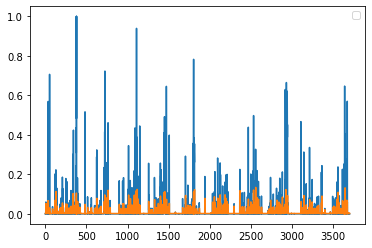

In [242]:
plt.plot(y_test)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
ypred1[ypred1<0] = 0

In [0]:
from sklearn.metrics import mean_absolute_error

In [55]:
mean_absolute_error(y,ypred)

0.010485030535203757

In [56]:
mean_absolute_error(y_test,ypred1)

0.020547209870899894

In [244]:
 from sklearn.metrics import r2_score
 r2_score(y,ypred)

0.16772388269776406

In [243]:
r2_score(y_test,ypred1)

0.12094649865763718

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [246]:
model.fit(X1, y1, validation_data=(X_test1,y_test1),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 5s 410us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 3.3888e-04 - val_acc: 0.8533
Epoch 2/50
11997/11997 [==============================] - 3s 238us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.8164e-04 - val_acc: 0.8533
Epoch 3/50
11997/11997 [==============================] - 3s 234us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 2.8359e-04 - val_acc: 0.8533
Epoch 4/50
11997/11997 [==============================] - 3s 239us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 3.5493e-04 - val_acc: 0.8533
Epoch 5/50
11997/11997 [==============================] - 3s 240us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 3.1169e-04 - val_acc: 0.8533
Epoch 6/50
11997/11997 [==============================] - 3s 240us/sample - loss: 0.0015 - acc: 0.8519 - val_loss: 3.3168e-04 - val_acc: 0.8533
Epoch 7/50
11997/11997 [==============================] - 3s 240us/sample - loss: 0.001

In [247]:
ypred = model.predict(X1)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y1)
s1.corrwith(s, axis = 0) 

0    0.380658
dtype: float64

In [248]:
ypred1=model.predict(X_test1)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test1)
s1.corrwith(s,axis=0)

0    0.00005
dtype: float64

In [207]:
mean_absolute_error(y1,ypred)

0.01808453178719442

In [249]:
mean_absolute_error(y_test1,ypred1)

0.0024921779056665118

In [250]:
r2_score(y1,ypred)

0.14183768399091345

In [251]:
r2_score(y_test1,ypred1)

-0.027502850308888105

In [0]:
ypred1[ypred1<0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

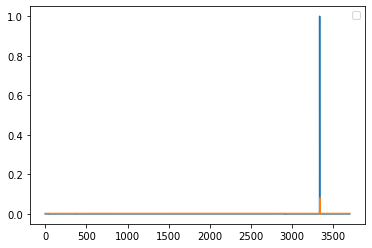

In [253]:
plt.plot(y_test1)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

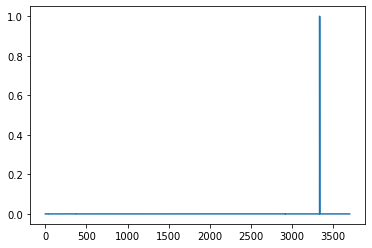

In [254]:
plt.plot(y_test1)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [256]:
model.fit(X2, y2, validation_data=(X_test2,y_test2),epochs=50)

Train on 11997 samples, validate on 3671 samples
Epoch 1/50
11997/11997 [==============================] - 5s 397us/sample - loss: 0.0049 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 2/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 3/50
11997/11997 [==============================] - 3s 230us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0024 - val_acc: 0.8635
Epoch 4/50
11997/11997 [==============================] - 3s 238us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 5/50
11997/11997 [==============================] - 3s 230us/sample - loss: 0.0048 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 6/50
11997/11997 [==============================] - 3s 239us/sample - loss: 0.0047 - acc: 0.8414 - val_loss: 0.0023 - val_acc: 0.8635
Epoch 7/50
11997/11997 [==============================] - 3s 245us/sample - loss: 0.0047 - acc: 0.8414 - val_lo

In [257]:
ypred = model.predict(X2)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y2)
s1.corrwith(s, axis = 0) 

0    0.2595
dtype: float64

In [258]:
ypred1=model.predict(X_test2)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test2)
s1.corrwith(s,axis=0)

0    0.199158
dtype: float64

In [259]:
mean_absolute_error(y2,ypred)

0.02685382220982146

In [260]:
mean_absolute_error(y_test2,ypred1)

0.02040870132802727

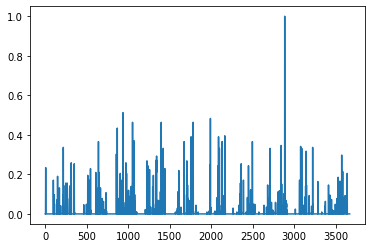

In [261]:
plt.plot(y_test2)

In [262]:
r2_score(y2,ypred)

0.06653181067519831

In [263]:
r2_score(y_test2,ypred1)

0.027986317045928688

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

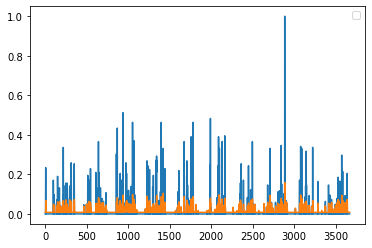

In [265]:
plt.plot(y_test2)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [141]:
model.fit(X3, y3, validation_data=(X_test3,y_test3),epochs=50)

Train on 11997 samples, validate on 3701 samples
Epoch 1/50
11997/11997 [==============================] - 3s 263us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 2/50
11997/11997 [==============================] - 2s 206us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 3/50
11997/11997 [==============================] - 3s 209us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 4/50
11997/11997 [==============================] - 3s 215us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 5/50
11997/11997 [==============================] - 3s 213us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 6/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0032 - acc: 0.8605 - val_loss: 0.0041 - val_acc: 0.8708
Epoch 7/50
11997/11997 [==============================] - 3s 214us/sample - loss: 0.0032 - acc: 0.8605 - val_lo

In [142]:
ypred = model.predict(X3)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y3)
s1.corrwith(s, axis = 0) 

0    0.260896
dtype: float64

In [143]:
ypred1=model.predict(X_test3)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test3)
s1.corrwith(s,axis=0)

0    0.187699
dtype: float64

In [144]:
r2_score(y3,ypred)

0.06579693900632388

In [145]:
r2_score(y_test3,ypred1)

0.03079401919721303

In [146]:
mean_absolute_error(y3,ypred)

0.022004832119353206

In [147]:
mean_absolute_error(y_test3,ypred1)

0.02241229461988656

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

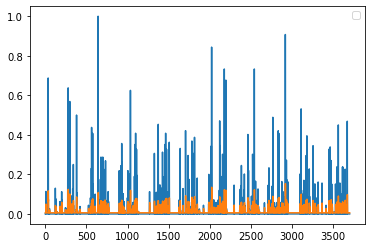

In [149]:
plt.plot(y_test3)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [268]:
model.fit(X4, y4, validation_data=(X_test4,y_test4),epochs=50)

Train on 11997 samples, validate on 3643 samples
Epoch 1/50
11997/11997 [==============================] - 4s 374us/sample - loss: 0.0029 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 2/50
11997/11997 [==============================] - 3s 221us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 3/50
11997/11997 [==============================] - 3s 215us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 4/50
11997/11997 [==============================] - 3s 222us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 5/50
11997/11997 [==============================] - 3s 220us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 6/50
11997/11997 [==============================] - 3s 213us/sample - loss: 0.0028 - acc: 0.8360 - val_loss: 0.0043 - val_acc: 0.8433
Epoch 7/50
11997/11997 [==============================] - 3s 216us/sample - loss: 0.0028 - acc: 0.8360 - val_lo

In [269]:
ypred = model.predict(X4)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y4)
s1.corrwith(s, axis = 0) 

0    0.304448
dtype: float64

In [270]:
ypred1=model.predict(X_test4)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test4)
s1.corrwith(s,axis=0)

0    0.182652
dtype: float64

In [271]:
mean_absolute_error(y4,ypred)

0.01986767704904677

In [272]:
mean_absolute_error(y_test4,ypred1)

0.024276902214180242

In [273]:
r2_score(y4,ypred)

0.0911766015779848

In [274]:
r2_score(y_test4,ypred1)

0.017449384726058503

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

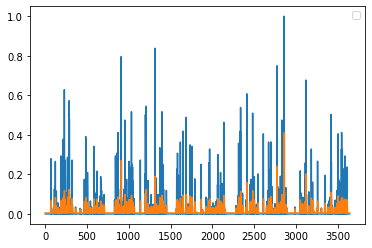

In [277]:
plt.plot(y_test4)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [279]:
model.fit(X5, y5, validation_data=(X_test5,y_test5),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 411us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 2/50
11997/11997 [==============================] - 3s 226us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 3/50
11997/11997 [==============================] - 3s 226us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 4/50
11997/11997 [==============================] - 3s 225us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 5/50
11997/11997 [==============================] - 3s 222us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0031 - val_acc: 0.8614
Epoch 6/50
11997/11997 [==============================] - 3s 223us/sample - loss: 0.0018 - acc: 0.8467 - val_loss: 0.0030 - val_acc: 0.8614
Epoch 7/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0018 - acc: 0.8467 - val_lo

In [280]:
ypred = model.predict(X5)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y5)
s1.corrwith(s, axis = 0) 

0    0.255139
dtype: float64

In [281]:
r2_score(y5,ypred)

0.053905421098069506

In [282]:
ypred1=model.predict(X_test5)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test5)
s1.corrwith(s,axis=0)

0    0.166289
dtype: float64

In [283]:
mean_absolute_error(y5,ypred)

0.013047579938388223

In [284]:
mean_absolute_error(y_test5,ypred1)

0.01709224565691579

In [285]:
r2_score(y_test5,ypred1)

0.008178770927025791

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

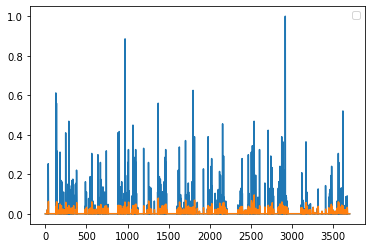

In [287]:
plt.plot(y_test5)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [290]:
model.fit(X6, y6, validation_data=(X_test6,y_test6),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 395us/sample - loss: 0.0032 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 2/50
11997/11997 [==============================] - 3s 227us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 3/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 4/50
11997/11997 [==============================] - 2s 207us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 5/50
11997/11997 [==============================] - 2s 200us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 6/50
11997/11997 [==============================] - 2s 204us/sample - loss: 0.0031 - acc: 0.8141 - val_loss: 0.0038 - val_acc: 0.8350
Epoch 7/50
11997/11997 [==============================] - 2s 203us/sample - loss: 0.0031 - acc: 0.8141 - val_lo

In [291]:
ypred = model.predict(X6)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y6)
s1.corrwith(s, axis = 0) 

0    0.318864
dtype: float64

In [292]:
r2_score(y6,ypred)

0.09120817077473364

In [293]:
ypred1=model.predict(X_test6)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test6)
s1.corrwith(s,axis=0)

0    0.266599
dtype: float64

In [294]:
mean_absolute_error(y6,ypred)

0.021386706892469253

In [295]:
mean_absolute_error(y_test6,ypred1)

0.021489462912384946

In [296]:
r2_score(y_test6,ypred1)

0.0636785559018268

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

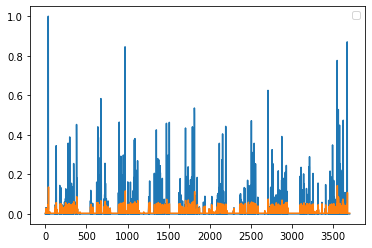

In [297]:
plt.plot(y_test6)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [300]:
model.fit(X7, y7, validation_data=(X_test7,y_test7),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 377us/sample - loss: 0.0036 - acc: 0.8333 - val_loss: 0.0028 - val_acc: 0.8293
Epoch 2/50
11997/11997 [==============================] - 2s 204us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 3/50
11997/11997 [==============================] - 2s 203us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 4/50
11997/11997 [==============================] - 2s 202us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 5/50
11997/11997 [==============================] - 2s 201us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0028 - val_acc: 0.8293
Epoch 6/50
11997/11997 [==============================] - 2s 201us/sample - loss: 0.0035 - acc: 0.8333 - val_loss: 0.0027 - val_acc: 0.8293
Epoch 7/50
11997/11997 [==============================] - 2s 205us/sample - loss: 0.0035 - acc: 0.8333 - val_lo

In [301]:
ypred = model.predict(X7)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y7)
s1.corrwith(s, axis = 0) 

0    0.348241
dtype: float64

In [302]:
r2_score(y7,ypred)

0.11971364923016747

In [303]:
ypred1=model.predict(X_test7)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test7)
s1.corrwith(s,axis=0)

0    0.191727
dtype: float64

In [304]:
r2_score(y_test7,ypred1)

0.003234366658747656

In [305]:
mean_absolute_error(y7,ypred)

0.02154161933847987

In [306]:
mean_absolute_error(y_test7,ypred1)

0.019516059913162218

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

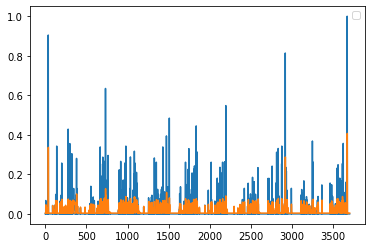

In [308]:
plt.plot(y_test7)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [310]:
model.fit(X8, y8, validation_data=(X_test8,y_test8),epochs=50)

Train on 11997 samples, validate on 3162 samples
Epoch 1/50
11997/11997 [==============================] - 5s 427us/sample - loss: 0.0037 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 2/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0037 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 3/50
11997/11997 [==============================] - 3s 225us/sample - loss: 0.0037 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 4/50
11997/11997 [==============================] - 3s 227us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 5/50
11997/11997 [==============================] - 3s 234us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 6/50
11997/11997 [==============================] - 3s 232us/sample - loss: 0.0036 - acc: 0.8384 - val_loss: 0.0039 - val_acc: 0.8447
Epoch 7/50
11997/11997 [==============================] - 3s 235us/sample - loss: 0.0036 - acc: 0.8384 - val_lo

In [311]:
ypred = model.predict(X8)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y8)
s1.corrwith(s, axis = 0) 

0    0.310832
dtype: float64

In [312]:
r2_score(y8,ypred)

0.09605503067024079

In [313]:
ypred1=model.predict(X_test8)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test8)
s1.corrwith(s,axis=0)

0    0.247525
dtype: float64

In [314]:
mean_absolute_error(y8,ypred)

0.024921469855087277

In [315]:
mean_absolute_error(y_test8,ypred1)

0.0256276205361213

In [316]:
r2_score(y_test8,ypred1)

0.060220203567069364

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

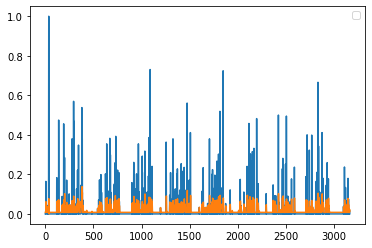

In [318]:
plt.plot(y_test8)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [320]:
model.fit(X9, y9, validation_data=(X_test9,y_test9),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 428us/sample - loss: 3.7858e-04 - acc: 0.8766 - val_loss: 2.7536e-04 - val_acc: 0.8439
Epoch 2/50
11997/11997 [==============================] - 3s 216us/sample - loss: 3.7191e-04 - acc: 0.8766 - val_loss: 2.8237e-04 - val_acc: 0.8439
Epoch 3/50
11997/11997 [==============================] - 3s 221us/sample - loss: 3.6964e-04 - acc: 0.8766 - val_loss: 2.8335e-04 - val_acc: 0.8439
Epoch 4/50
11997/11997 [==============================] - 3s 231us/sample - loss: 3.6743e-04 - acc: 0.8766 - val_loss: 2.7355e-04 - val_acc: 0.8439
Epoch 5/50
11997/11997 [==============================] - 3s 223us/sample - loss: 3.6723e-04 - acc: 0.8766 - val_loss: 2.7357e-04 - val_acc: 0.8439
Epoch 6/50
11997/11997 [==============================] - 3s 211us/sample - loss: 3.6509e-04 - acc: 0.8766 - val_loss: 2.7536e-04 - val_acc: 0.8439
Epoch 7/50
11997/11997 [==============================] - 3s 21

In [321]:
ypred = model.predict(X9)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y9)
s1.corrwith(s, axis = 0) 

0    0.319171
dtype: float64

In [322]:
r2_score(y9,ypred)

0.10109381583604049

In [323]:
ypred1=model.predict(X_test9)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test9)
s1.corrwith(s,axis=0)

0    0.000308
dtype: float64

In [324]:
r2_score(y_test9,ypred1)

-0.01135372119216016

In [325]:
mean_absolute_error(y9,ypred)

0.006125944903211532

In [326]:
mean_absolute_error(y_test9,ypred1)

0.0021464346242975915

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

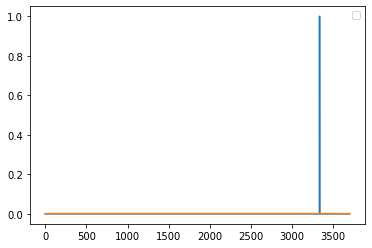

In [328]:
plt.plot(y_test9)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

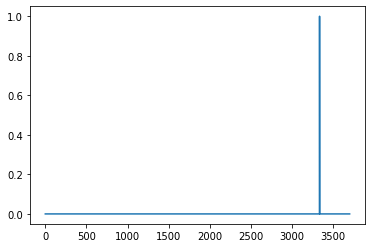

In [329]:
plt.plot(y_test9)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [331]:
model.fit(X10, y10, validation_data=(X_test10,y_test10),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 420us/sample - loss: 0.0028 - acc: 0.8375 - val_loss: 3.6000e-04 - val_acc: 0.8501
Epoch 2/50
11997/11997 [==============================] - 3s 209us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 4.0560e-04 - val_acc: 0.8501
Epoch 3/50
11997/11997 [==============================] - 3s 214us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 4.1485e-04 - val_acc: 0.8501
Epoch 4/50
11997/11997 [==============================] - 3s 211us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 3.8273e-04 - val_acc: 0.8501
Epoch 5/50
11997/11997 [==============================] - 3s 216us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 3.3831e-04 - val_acc: 0.8501
Epoch 6/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0027 - acc: 0.8375 - val_loss: 4.0701e-04 - val_acc: 0.8501
Epoch 7/50
11997/11997 [==============================] - 3s 214us/sample - loss: 0.002

In [332]:
ypred = model.predict(X10)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y10)
s1.corrwith(s, axis = 0) 

0    0.33695
dtype: float64

In [333]:
r2_score(y10,ypred)

0.11348873205966681

In [334]:
ypred1=model.predict(X_test10)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test10)
s1.corrwith(s,axis=0)

0   -0.000462
dtype: float64

In [335]:
r2_score(y_test10,ypred1)

-0.19706519668635591

In [336]:
mean_absolute_error(y_test10,ypred1)

0.007170882713324374

In [337]:
mean_absolute_error(y10,ypred)

0.021344000369672534

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

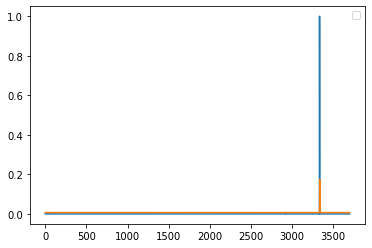

In [339]:
plt.plot(y_test10)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

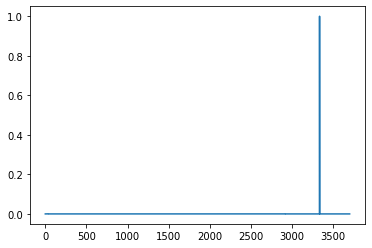

In [340]:
plt.plot(y_test10)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [342]:
model.fit(X11, y11, validation_data=(X_test11,y_test11),epochs=50)

Train on 11997 samples, validate on 3342 samples
Epoch 1/50
11997/11997 [==============================] - 5s 421us/sample - loss: 0.0028 - acc: 0.8450 - val_loss: 3.2207e-04 - val_acc: 0.8606
Epoch 2/50
11997/11997 [==============================] - 2s 205us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 4.5865e-04 - val_acc: 0.8606
Epoch 3/50
11997/11997 [==============================] - 2s 204us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 4.1620e-04 - val_acc: 0.8606
Epoch 4/50
11997/11997 [==============================] - 2s 204us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.3798e-04 - val_acc: 0.8606
Epoch 5/50
11997/11997 [==============================] - 2s 203us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.4825e-04 - val_acc: 0.8606
Epoch 6/50
11997/11997 [==============================] - 2s 198us/sample - loss: 0.0027 - acc: 0.8450 - val_loss: 3.5970e-04 - val_acc: 0.8606
Epoch 7/50
11997/11997 [==============================] - 2s 206us/sample - loss: 0.002

In [343]:
ypred = model.predict(X11)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y11)
s1.corrwith(s, axis = 0) 

0    0.315293
dtype: float64

In [344]:
r2_score(y11,ypred)

0.09893305461725621

In [345]:
ypred1=model.predict(X_test11)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test11)
s1.corrwith(s,axis=0)

0   -0.000596
dtype: float64

In [346]:
r2_score(y_test11,ypred1)

-0.11303341525532762

In [347]:
mean_absolute_error(y_test11,ypred1)

0.006016060437849211

In [348]:
mean_absolute_error(y11,ypred)

0.020134800350505782

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

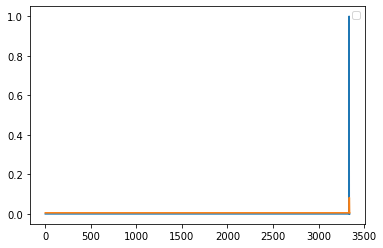

In [350]:
plt.plot(y_test11)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [353]:
model.fit(X12, y12, validation_data=(X_test12,y_test12),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 424us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 2.8717e-04 - val_acc: 0.8379
Epoch 2/50
11997/11997 [==============================] - 2s 203us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 4.0677e-04 - val_acc: 0.8379
Epoch 3/50
11997/11997 [==============================] - 2s 200us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 2.9719e-04 - val_acc: 0.8379
Epoch 4/50
11997/11997 [==============================] - 2s 200us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 3.3177e-04 - val_acc: 0.8379
Epoch 5/50
11997/11997 [==============================] - 2s 200us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 2.8321e-04 - val_acc: 0.8379
Epoch 6/50
11997/11997 [==============================] - 2s 199us/sample - loss: 0.0018 - acc: 0.8385 - val_loss: 3.2310e-04 - val_acc: 0.8379
Epoch 7/50
11997/11997 [==============================] - 2s 202us/sample - loss: 0.001

In [354]:
ypred = model.predict(X12)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y12)
s1.corrwith(s, axis = 0) 

0    0.364602
dtype: float64

In [355]:
r2_score(y12,ypred)

0.13221849518096385

In [356]:
ypred1=model.predict(X_test12)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test12)
s1.corrwith(s,axis=0)

0   -0.000207
dtype: float64

In [357]:
r2_score(y_test12,ypred1)

-0.1794430657022752

In [358]:
mean_absolute_error(y_test12,ypred1)

0.007070013846746588

In [359]:
mean_absolute_error(y12,ypred)

0.017318185105018088

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

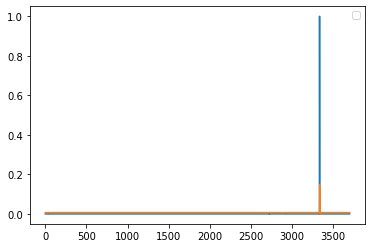

In [361]:
plt.plot(y_test12)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

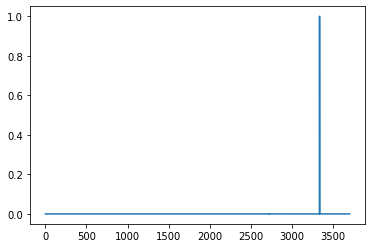

In [362]:
plt.plot(y_test12)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [364]:
model.fit(X13, y13, validation_data=(X_test13,y_test13),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 5s 451us/sample - loss: 0.0028 - acc: 0.8430 - val_loss: 4.7241e-04 - val_acc: 0.8598
Epoch 2/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0027 - acc: 0.8430 - val_loss: 2.9753e-04 - val_acc: 0.8598
Epoch 3/50
11997/11997 [==============================] - 3s 213us/sample - loss: 0.0027 - acc: 0.8430 - val_loss: 3.8425e-04 - val_acc: 0.8598
Epoch 4/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0027 - acc: 0.8430 - val_loss: 2.9454e-04 - val_acc: 0.8598
Epoch 5/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0027 - acc: 0.8430 - val_loss: 3.5844e-04 - val_acc: 0.8598
Epoch 6/50
11997/11997 [==============================] - 3s 212us/sample - loss: 0.0027 - acc: 0.8430 - val_loss: 2.8428e-04 - val_acc: 0.8598
Epoch 7/50
11997/11997 [==============================] - 3s 211us/sample - loss: 0.002

In [365]:
ypred = model.predict(X13)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y13)
s1.corrwith(s, axis = 0) 

0    0.316085
dtype: float64

In [366]:
r2_score(y13,ypred)

0.09665115474485608

In [367]:
ypred1=model.predict(X_test13)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test13)
s1.corrwith(s,axis=0)

0   -0.00054
dtype: float64

In [368]:
r2_score(y_test13,ypred1)

-0.34619952158671086

In [369]:
mean_absolute_error(y_test13,ypred1)

0.009970447918549567

In [370]:
mean_absolute_error(y13,ypred)

0.02300573595029764

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

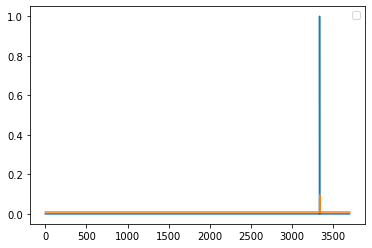

In [372]:
plt.plot(y_test13)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

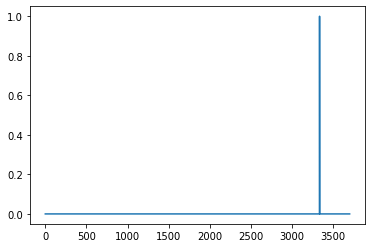

In [373]:
plt.plot(y_test13)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [375]:
model.fit(X14, y14, validation_data=(X_test14,y_test14),epochs=50)

Train on 11997 samples, validate on 3675 samples
Epoch 1/50
11997/11997 [==============================] - 6s 492us/sample - loss: 0.0026 - acc: 0.8338 - val_loss: 0.0040 - val_acc: 0.8465
Epoch 2/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0025 - acc: 0.8338 - val_loss: 0.0039 - val_acc: 0.8465
Epoch 3/50
11997/11997 [==============================] - 3s 221us/sample - loss: 0.0025 - acc: 0.8338 - val_loss: 0.0040 - val_acc: 0.8465
Epoch 4/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0025 - acc: 0.8338 - val_loss: 0.0040 - val_acc: 0.8465
Epoch 5/50
11997/11997 [==============================] - 3s 224us/sample - loss: 0.0025 - acc: 0.8338 - val_loss: 0.0040 - val_acc: 0.8465
Epoch 6/50
11997/11997 [==============================] - 3s 232us/sample - loss: 0.0025 - acc: 0.8338 - val_loss: 0.0040 - val_acc: 0.8465
Epoch 7/50
11997/11997 [==============================] - 3s 228us/sample - loss: 0.0025 - acc: 0.8338 - val_lo

In [376]:
ypred = model.predict(X14)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y14)
s1.corrwith(s, axis = 0) 

0    0.292231
dtype: float64

In [377]:
from sklearn.metrics import r2_score
r2_score(y14,ypred)

0.08506457754995367

In [378]:
ypred1=model.predict(X_test14)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test14)
s1.corrwith(s,axis=0)

0    0.209401
dtype: float64

In [379]:
r2_score(y_test14,ypred1)

0.04054501897681484

In [380]:
mean_absolute_error(y_test14,ypred1)

0.02453584910092482

In [381]:
mean_absolute_error(y14,ypred)

0.020587524983575294

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

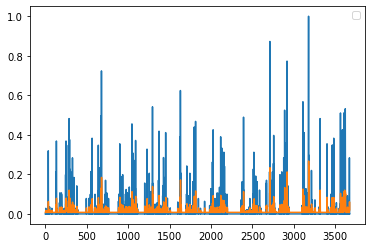

In [383]:
plt.plot(y_test14)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

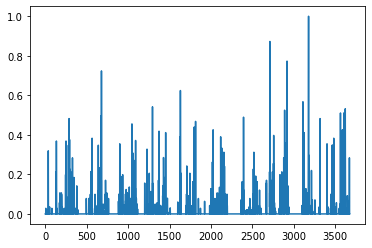

In [384]:
plt.plot(y_test14)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [386]:
model.fit(X15, y15, validation_data=(X_test15,y_test15),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 6s 493us/sample - loss: 0.0032 - acc: 0.8192 - val_loss: 0.0042 - val_acc: 0.8339
Epoch 2/50
11997/11997 [==============================] - 3s 215us/sample - loss: 0.0031 - acc: 0.8192 - val_loss: 0.0043 - val_acc: 0.8339
Epoch 3/50
11997/11997 [==============================] - 3s 213us/sample - loss: 0.0031 - acc: 0.8192 - val_loss: 0.0043 - val_acc: 0.8339
Epoch 4/50
11997/11997 [==============================] - 3s 213us/sample - loss: 0.0031 - acc: 0.8192 - val_loss: 0.0043 - val_acc: 0.8339
Epoch 5/50
11997/11997 [==============================] - 3s 221us/sample - loss: 0.0031 - acc: 0.8192 - val_loss: 0.0042 - val_acc: 0.8339
Epoch 6/50
11997/11997 [==============================] - 3s 217us/sample - loss: 0.0031 - acc: 0.8192 - val_loss: 0.0042 - val_acc: 0.8339
Epoch 7/50
11997/11997 [==============================] - 3s 222us/sample - loss: 0.0031 - acc: 0.8192 - val_lo

In [387]:
ypred = model.predict(X15)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y15)
s1.corrwith(s, axis = 0) 

0    0.263956
dtype: float64

In [388]:
from sklearn.metrics import r2_score
r2_score(y15,ypred)

0.06944400189659516

In [389]:
ypred1=model.predict(X_test15)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test15)
s1.corrwith(s,axis=0)

0    0.225934
dtype: float64

In [390]:
from sklearn.metrics import r2_score
r2_score(y_test15,ypred1)

0.04852797590775515

In [391]:
mean_absolute_error(y_test15,ypred1)

0.025881710672552648

In [392]:
mean_absolute_error(y15,ypred)

0.022292173215808477

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

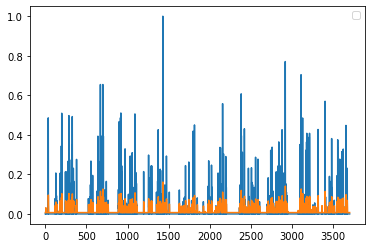

In [394]:
plt.plot(y_test15)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

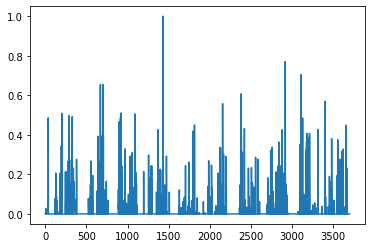

In [395]:
plt.plot(y_test15)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [397]:
model.fit(X16, y16, validation_data=(X_test16,y_test16),epochs=100)

Train on 11997 samples, validate on 3702 samples
Epoch 1/100
11997/11997 [==============================] - 6s 479us/sample - loss: 0.0026 - acc: 0.8464 - val_loss: 0.0026 - val_acc: 0.8760
Epoch 2/100
11997/11997 [==============================] - 3s 210us/sample - loss: 0.0025 - acc: 0.8464 - val_loss: 0.0026 - val_acc: 0.8760
Epoch 3/100
11997/11997 [==============================] - 3s 210us/sample - loss: 0.0025 - acc: 0.8464 - val_loss: 0.0026 - val_acc: 0.8760
Epoch 4/100
11997/11997 [==============================] - 3s 221us/sample - loss: 0.0025 - acc: 0.8464 - val_loss: 0.0026 - val_acc: 0.8760
Epoch 5/100
11997/11997 [==============================] - 3s 220us/sample - loss: 0.0025 - acc: 0.8464 - val_loss: 0.0026 - val_acc: 0.8760
Epoch 6/100
11997/11997 [==============================] - 3s 220us/sample - loss: 0.0025 - acc: 0.8464 - val_loss: 0.0027 - val_acc: 0.8760
Epoch 7/100
11997/11997 [==============================] - 3s 219us/sample - loss: 0.0025 - acc: 0.8464 -

In [398]:
ypred = model.predict(X16)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y16)
s1.corrwith(s, axis = 0) 

0    0.276835
dtype: float64

In [399]:
from sklearn.metrics import r2_score
r2_score(y16,ypred)

0.07536690898826592

In [400]:
ypred1=model.predict(X_test16)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test16)
s1.corrwith(s,axis=0)

0    0.211769
dtype: float64

In [401]:
r2_score(y_test16,ypred1)

0.04377041461970843

In [402]:
mean_absolute_error(y_test16,ypred1)

0.01993251246883298

In [403]:
mean_absolute_error(y16,ypred)

0.020799796994419723

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

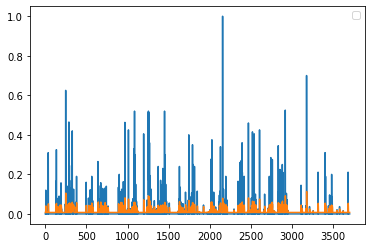

In [405]:
plt.plot(y_test16)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

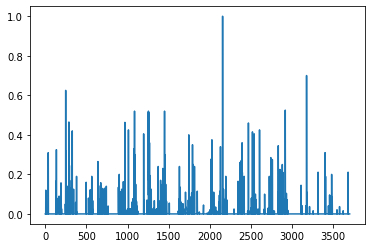

In [406]:
plt.plot(y_test16)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [408]:
model.fit(X17, y17, validation_data=(X_test17,y_test17),epochs=50)

Train on 11997 samples, validate on 3702 samples
Epoch 1/50
11997/11997 [==============================] - 6s 501us/sample - loss: 0.0026 - acc: 0.8949 - val_loss: 0.0083 - val_acc: 0.8947
Epoch 2/50
11997/11997 [==============================] - 3s 219us/sample - loss: 0.0025 - acc: 0.8949 - val_loss: 0.0081 - val_acc: 0.8947
Epoch 3/50
11997/11997 [==============================] - 3s 219us/sample - loss: 0.0025 - acc: 0.8949 - val_loss: 0.0081 - val_acc: 0.8947
Epoch 4/50
11997/11997 [==============================] - 3s 218us/sample - loss: 0.0025 - acc: 0.8949 - val_loss: 0.0082 - val_acc: 0.8947
Epoch 5/50
11997/11997 [==============================] - 3s 219us/sample - loss: 0.0025 - acc: 0.8949 - val_loss: 0.0080 - val_acc: 0.8947
Epoch 6/50
11997/11997 [==============================] - 3s 214us/sample - loss: 0.0025 - acc: 0.8949 - val_loss: 0.0081 - val_acc: 0.8947
Epoch 7/50
11997/11997 [==============================] - 3s 227us/sample - loss: 0.0025 - acc: 0.8949 - val_lo

In [409]:
ypred = model.predict(X17)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y17)
s1.corrwith(s, axis = 0) 

0    0.286753
dtype: float64

In [410]:
from sklearn.metrics import r2_score
r2_score(y17,ypred)

0.08048536949036145

In [411]:
ypred1=model.predict(X_test17)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test17)
s1.corrwith(s,axis=0)

0    0.190129
dtype: float64

In [412]:
r2_score(y_test17,ypred1)

0.026637523139255825

In [413]:
mean_absolute_error(y_test17,ypred1)

0.0306611005984226

In [414]:
mean_absolute_error(y17,ypred)

0.01764593808973321

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

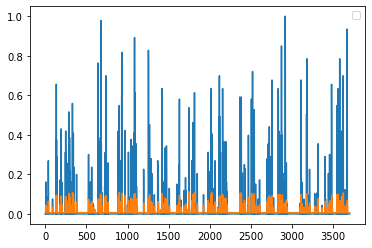

In [416]:
plt.plot(y_test17)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

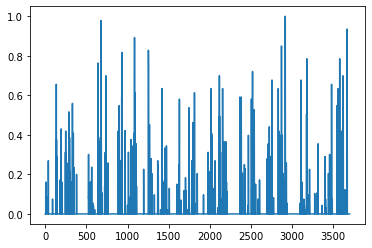

In [417]:
plt.plot(y_test17)
plt.show()

In [0]:
model = keras.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [419]:
model.fit(X18, y18, validation_data=(X_test18,y_test18),epochs=100)

Train on 11997 samples, validate on 3701 samples
Epoch 1/100
11997/11997 [==============================] - 7s 578us/sample - loss: 1.5777e-04 - acc: 0.8540 - val_loss: 0.0024 - val_acc: 0.8646
Epoch 2/100
11997/11997 [==============================] - 3s 253us/sample - loss: 1.5849e-04 - acc: 0.8540 - val_loss: 0.0024 - val_acc: 0.8646
Epoch 3/100
11997/11997 [==============================] - 3s 256us/sample - loss: 1.5650e-04 - acc: 0.8540 - val_loss: 0.0024 - val_acc: 0.8646
Epoch 4/100
11997/11997 [==============================] - 3s 252us/sample - loss: 1.5719e-04 - acc: 0.8540 - val_loss: 0.0023 - val_acc: 0.8646
Epoch 5/100
11997/11997 [==============================] - 3s 257us/sample - loss: 1.5604e-04 - acc: 0.8540 - val_loss: 0.0024 - val_acc: 0.8646
Epoch 6/100
11997/11997 [==============================] - 3s 249us/sample - loss: 1.5685e-04 - acc: 0.8540 - val_loss: 0.0023 - val_acc: 0.8646
Epoch 7/100
11997/11997 [==============================] - 3s 248us/sample - loss

In [420]:
ypred = model.predict(X18)
s=pd.DataFrame(ypred)
s1=pd.DataFrame(y18)
s1.corrwith(s, axis = 0) 

0    0.186974
dtype: float64

In [421]:
from sklearn.metrics import r2_score
r2_score(y18,ypred)

0.0330759644754558

In [422]:
ypred1 = model.predict(X_test18)
s=pd.DataFrame(ypred1)
s1=pd.DataFrame(y_test18)
s1.corrwith(s, axis = 0) 

0    0.191336
dtype: float64

In [423]:
r2_score(y_test18,ypred1)

-0.020726288906547374

In [424]:
mean_absolute_error(y_test18,ypred1)

0.0125228526261066

In [425]:
mean_absolute_error(y18,ypred)

0.003046358106818243

In [0]:
ypred1[ypred1<0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

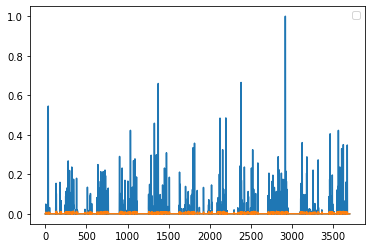

In [427]:
plt.plot(y_test18)
plt.plot(ypred1)
plt.legend("Actual","predicted")
plt.show()

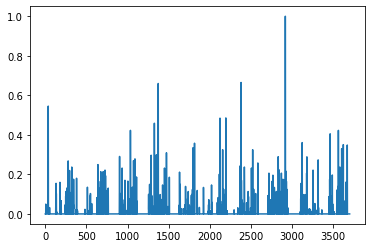

In [428]:
plt.plot(y_test18)
plt.show()